# Исследовательский анализ данных в Python и проверка гипотез в Яндекс Афиша


- Автор: Фёдорова Александра 

## Загрузка данных и знакомство с ними

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
!pip install matplotlib-venn
from matplotlib_venn import venn2
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from matplotlib.ticker import FuncFormatter

     |████████████████████████████████| 40 kB 739 kB/s eta 0:00:011
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=80970580e7826d5fb816b2e6f44aecc454a792a1f1e25568f54e8d00fe9e436c
  Stored in directory: /home/jovyan/.cache/pip/wheels/86/29/d8/0f3c5a37c967a34fb40aaabd414f92104d2ad5fb149c0114a1
Successfully built matplotlib-venn


In [2]:
#загружаем данные
PATH = "https://code.s3.yandex.net/datasets/"
orders_df = pd.read_csv(PATH + 'final_tickets_orders_df.csv', parse_dates = ['created_dt_msk', 'created_ts_msk'])
events_df = pd.read_csv(PATH + 'final_tickets_events_df.csv')
tenge_df = pd.read_csv(PATH + 'final_tickets_tenge_df.csv', parse_dates = ['data'])

In [3]:
#выводим информацию о датафрейме orders_df и первые строки
orders_df.info()
orders_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               290849 non-null  int64         
 1   user_id                290849 non-null  object        
 2   created_dt_msk         290849 non-null  datetime64[ns]
 3   created_ts_msk         290849 non-null  datetime64[ns]
 4   event_id               290849 non-null  int64         
 5   cinema_circuit         290849 non-null  object        
 6   age_limit              290849 non-null  int64         
 7   currency_code          290849 non-null  object        
 8   device_type_canonical  290849 non-null  object        
 9   revenue                290849 non-null  float64       
 10  service_name           290849 non-null  object        
 11  tickets_count          290849 non-null  int64         
 12  total                  290849 non-null  floa

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
#выводим информацию о датафрейме events_df и первые строки
events_df.info()
events_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [5]:
#выводим информацию о датафрейме tenge_df и первые строки
tenge_df.info()
tenge_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


# Промежуточный вывод

- Объема данных достаточно для анализа, данные соответствуют описанию. 
- Необходимые столбцы приведены к типу datetime.

## Предобработка данных и подготовка их к исследованию

### Проверка данных на пропуски

In [6]:
#выведем кол-во пропусков 
orders_df.isna().sum().sort_values()

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64

In [7]:
#выведем кол-во пропусков 
tenge_df.isna().sum().sort_values()

data       0
nominal    0
curs       0
cdx        0
dtype: int64

In [8]:
#выведем кол-во пропусков 
events_df.isna().sum().sort_values()

event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64

### Распределение и наличие выбросов

Text(0.5, 0, 'Валюта в рублях')

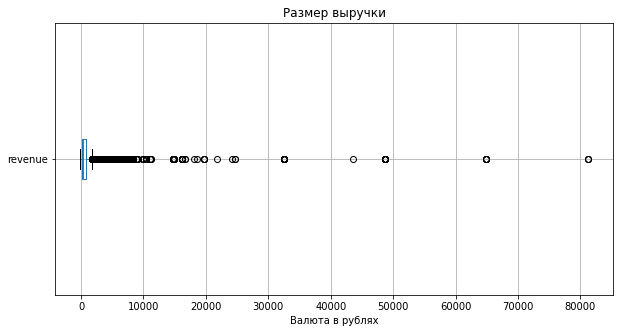

In [9]:
#проверим на выбросы 'выручку' в валюте rub
orders_df_rub = orders_df[orders_df['currency_code'] == 'rub']
#построим диаграмму размаха с выбросами
boxplot = orders_df_rub.boxplot(column='revenue',
                     vert=False, 
                     figsize=(10,5))

boxplot.set_title('Размер выручки')
boxplot.set_xlabel('Валюта в рублях')

In [10]:
#найдем 99й процентиль
percentile_99_rubles = np.percentile(orders_df_rub['revenue'], 99)
#отберем значения
filtered_orders_df = orders_df_rub[orders_df_rub['revenue'] <= percentile_99_rubles]

Text(0.5, 0, 'Валюта в тенге')

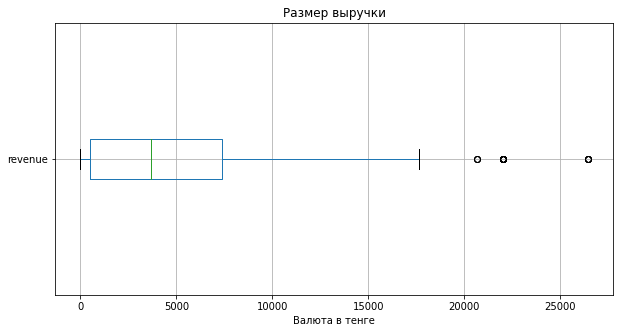

In [11]:
#проверим на выбросы выручку в валюте kzt
orders_df_rub = orders_df[orders_df['currency_code'] == 'kzt']
#построим диаграмму размаха с выбросами
boxplot = orders_df_rub.boxplot(column='revenue',
                     vert=False, 
                     figsize=(10,5))

boxplot.set_title('Размер выручки')
boxplot.set_xlabel('Валюта в тенге')

Text(0.5, 0, 'Кол-во')

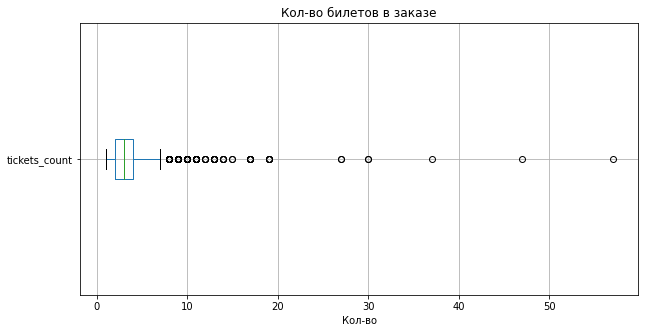

In [12]:
#проверим на выбросы кол-во билетов в заказе в валюте rub
orders_df_rub = orders_df[orders_df['currency_code'] == 'rub']
#построим диаграмму размаха с выбросами
boxplot = orders_df_rub.boxplot(column='tickets_count',
                     vert=False, 
                     figsize=(10,5))

boxplot.set_title('Кол-во билетов в заказе')
boxplot.set_xlabel('Кол-во')

Text(0.5, 0, 'Кол-во')

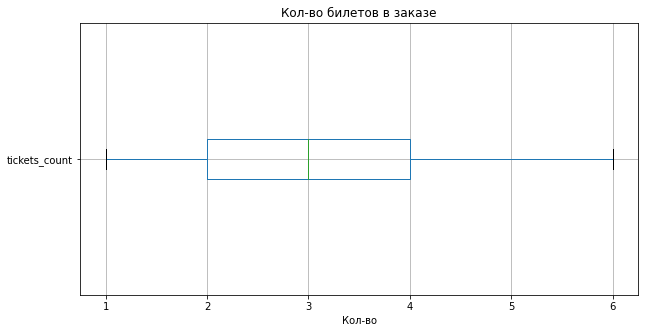

In [13]:
#проверим на выбросы кол-во билетов в заказе в валюте kzt
orders_df_rub = orders_df[orders_df['currency_code'] == 'kzt']
#построим диаграмму размаха с выбросами
boxplot = orders_df_rub.boxplot(column='tickets_count',
                     vert=False, 
                     figsize=(10,5))

boxplot.set_title('Кол-во билетов в заказе')
boxplot.set_xlabel('Кол-во')

### Проверка на явные и неявные дубликаты

In [14]:
#проверяем данные на наличие полных дубликатов
filtered_orders_df.duplicated().sum() 
events_df.duplicated().sum() 
tenge_df.duplicated().sum() 

0

In [15]:
#проверим неявные дубликаты
duplicates = filtered_orders_df.duplicated(subset=['user_id', 'created_ts_msk', 'device_type_canonical', 'created_dt_msk',
    'service_name', 'event_id','cinema_circuit', 'age_limit', 'currency_code',
    'revenue', 'total', 'tickets_count'])

In [16]:
duplicates.sum()

38

In [17]:
#удалим неявные дубликаты
filtered_orders_df.drop_duplicates(subset=['user_id', 'created_ts_msk', 'device_type_canonical', 'created_dt_msk',
    'service_name', 'event_id','cinema_circuit', 'age_limit', 'currency_code',
    'revenue', 'total', 'tickets_count']).reset_index(drop=True)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282879,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,Весь в билетах,4,9655.73,0.0
282880,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,Весь в билетах,6,14483.60,0.0
282881,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,Прачечная,2,4473.74,3.0
282882,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,Билеты без проблем,2,6615.34,NaN


### Проверка на категории в данных

In [18]:
#проверим неявные дубликаты в категориальных значениях
filtered_orders_df['cinema_circuit'].unique()

array(['нет', 'Другое', 'Киномакс', 'КиноСити', 'Москино', 'ЦентрФильм'],
      dtype=object)

Среди категорий встречается "нет", но оно не обозначает пропуск в данных.

In [19]:
#проверим неявные дубликаты в категориальных значениях
filtered_orders_df['age_limit'].unique()

array([16,  0, 18, 12,  6])

In [20]:
#проверим неявные дубликаты в категориальных значениях
filtered_orders_df['service_name'].unique()

array(['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!',
       'Билеты без проблем', 'Облачко', 'Лучшие билеты', 'Прачечная',
       'Быстробилет', 'Дом культуры', 'Весь в билетах', 'Билеты в руки',
       'Тебе билет!', 'Show_ticket', 'Городской дом культуры', 'Яблоко',
       'Билет по телефону', 'Выступления.ру', 'Росбилет',
       'Шоу начинается!', 'Мир касс', 'Восьмёрка', 'Телебилет',
       'Crazy ticket!', 'Реестр', 'Быстрый кассир', 'КарандашРУ',
       'Радио ticket', 'Дырокол', 'Вперёд!', 'Зе Бест!', 'Тех билет',
       'Лимоны', 'Билеты в интернете'], dtype=object)

# Промежуточный вывод
Было удалено 38 неявных дубликатов

### Создание новых столбцов

In [21]:
#соединим два датафрейма
merged_df = events_df.merge(filtered_orders_df, on = 'event_id', how = 'left')

In [22]:
#добавим к новому датафрейму необходимые столбцы из третьего датафрейма
df_final = merged_df.merge(tenge_df[['data','curs']], left_on = 'created_dt_msk', right_on = 'data')

In [23]:
#создадим столбец для приведения к единой валюте
def convert_revenue(row):
    if row['currency_code'] == 'rub':
        return row['revenue']
    elif row['currency_code'] == 'kzt':
        return row['revenue'] / 100 * row['curs']
    
df_final['revenue_rub'] = df_final.apply(convert_revenue, axis=1)

In [24]:
#создадим столбец с рассчетом выручки с продажи одного билета на мероприятие
df_final['one_ticket_revenue_rub'] = (df_final['revenue'].sum()) / (df_final['tickets_count'].sum())

In [25]:
#выделим месяц оформления заказа в отдельный столбец
df_final['month'] = df_final['created_dt_msk'].dt.month

In [26]:
#создадим столбец с информацией о сезонности
def season_def(row):
    if (row['month']  == 6) | (row['month']  == 7) | (row['month']  == 8):
        return 'лето'
    elif (row['month']  == 9) | (row['month']  == 10) | (row['month']  == 11):
        return 'осень'
    elif (row['month'] == 12) | (row['month']  == 1) | (row['month'] == 2):
        return 'зима'
    elif (row['month'] == 3) | (row['month'] == 4) | (row['month'] == 5):
        return 'весна'

df_final['season'] = df_final.apply(season_def, axis=1)

In [27]:
#выведем итоговый датафрейм со всеми новыми столбцами
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282684 entries, 0 to 282683
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   event_id                282684 non-null  int64         
 1   event_name              282684 non-null  object        
 2   event_type_description  282684 non-null  object        
 3   event_type_main         282684 non-null  object        
 4   organizers              282684 non-null  object        
 5   region_name             282684 non-null  object        
 6   city_name               282684 non-null  object        
 7   city_id                 282684 non-null  int64         
 8   venue_id                282684 non-null  int64         
 9   venue_name              282684 non-null  object        
 10  venue_address           282684 non-null  object        
 11  order_id                282684 non-null  float64       
 12  user_id                 282684

In [28]:
#посчитаем удаленную долю от изначального датасета
(len(orders_df) - len(df_final)) / len(df_final) * 100

2.888384202855485

# Промежуточный вывод
- Было удалено 38 дубликатов, создан итоговый датафрейм с новыми столбцами: revenue_rub, one_ticket_revenue_rub, month, season.
- Были выявлены выбросы, и отобраны нужные данные.
- Были обнаружены пропуски в столбце 'days_since_prev'.Были изучены категориальные признаки, не было найдено категорий которые означают пропуск в данных. 
- Удаленная доля от изначального датасета составила 2.9%.

## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

#### Для каждого месяца найдем кол-во заказов

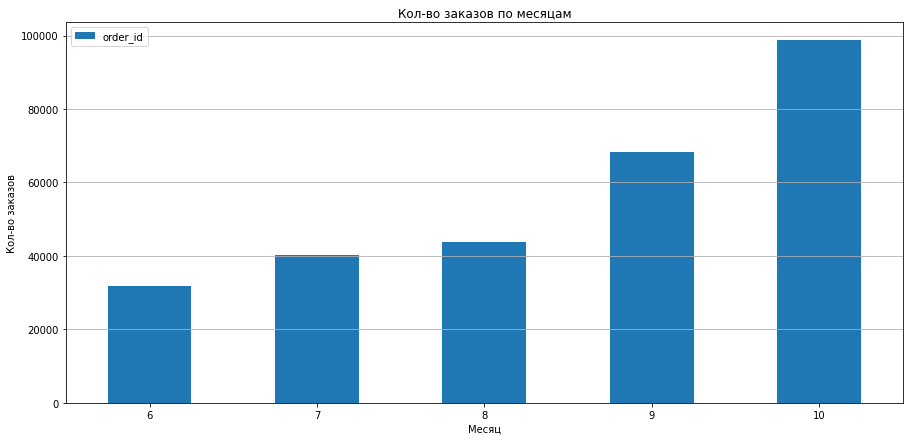

In [29]:
#для каждого месяца найдём кол-во заказов
month_groupby = df_final.groupby('month')['order_id'].count().sort_values(ascending = True)

#построим столбчатую диаграмму
month_groupby.plot(kind = 'bar', figsize=(15, 7))
plt.title('Кол-во заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во заказов')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()
plt.show()

- Кол-во заказов увеличивается от июня к ноябрю

#### Для осеннего и летнего периодов сравним распределение заказов билетов по разным категориям

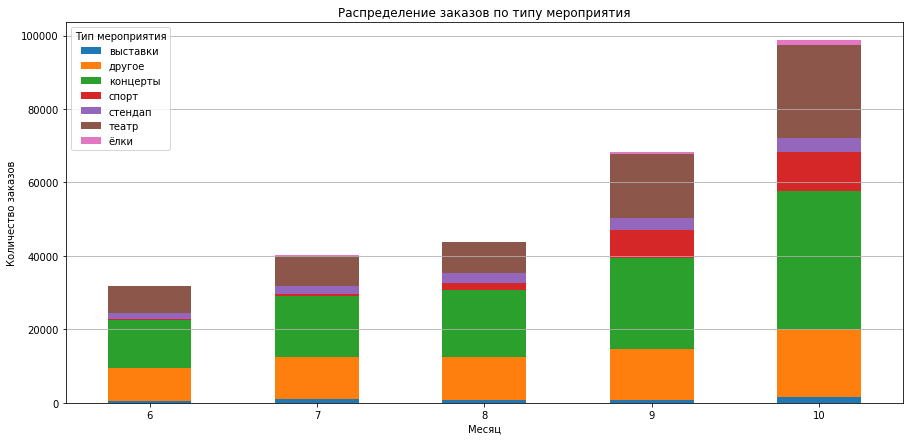

In [30]:
#сгруппируем и подсчитаем кол-во заказов
grouped = df_final.groupby(['month', 'event_type_main'])['order_id'].count().unstack()

#построим гистограмму накопления
grouped.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=0)
plt.title('Распределение заказов по типу мероприятия')
plt.legend(title='Тип мероприятия')
plt.grid(axis='y')
plt.show()

- Осенью кол-во заказов увеличивается практически во всех типах мероприятий

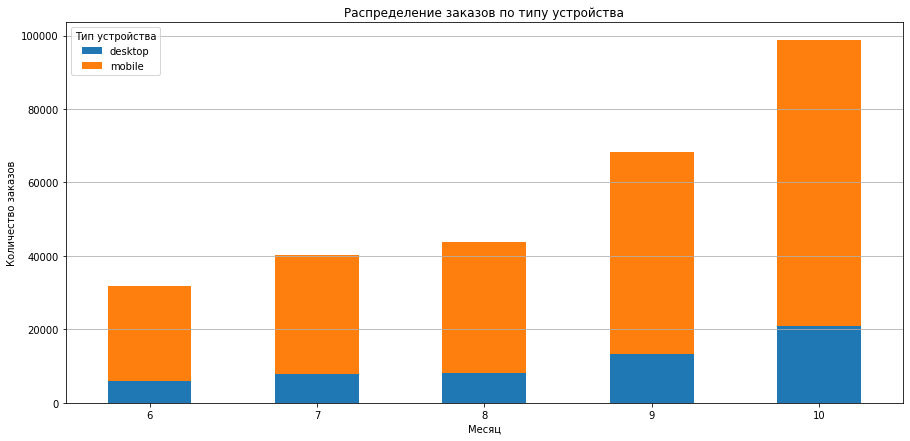

In [31]:
#сгруппируем и подсчитаем кол-во заказов
grouped = df_final.groupby(['month', 'device_type_canonical'])['order_id'].count().unstack()

#построим гистограмму накопления
grouped.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=0)
plt.title('Распределение заказов по типу устройства')
plt.legend(title='Тип устройства')
plt.grid(axis='y')
plt.show()

 - Осенью кол-во заказов увеличивается во всех типах устройств

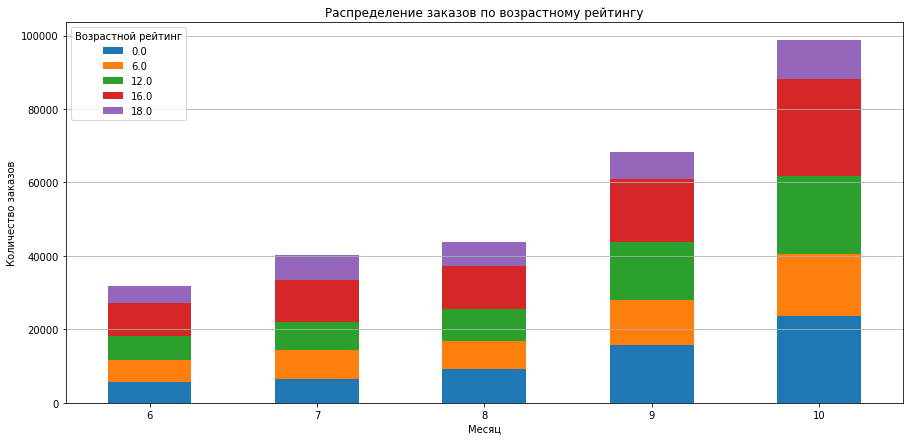

In [32]:
#сгруппируем и подсчитаем кол-во заказов
grouped = df_final.groupby(['month', 'age_limit'])['order_id'].count().unstack()

#построим гистограмму накопления
grouped.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=0)
plt.title('Распределение заказов по возрастному рейтингу')
plt.legend(title='Возрастной рейтинг')
plt.grid(axis='y')
plt.show()

 - Осенью кол-во заказов увеличивается во всех возрастных рейтингах

# Промежуточный вывод
- Категория по типу мероприятия: осенью кол-во заказов увеличивается во всех типах мероприятий
- Категория по типу устройства: осенью кол-во заказов увеличивается во всех типах устройств
- Категория по возрастному рейтингу: осенью кол-во заказов увеличивается во всех возрастных рейтингах

#### Изучим изменение выручки с продажи одного билета

In [33]:
#найдем выручку с продажи одного билета за лето
#отфильтруем по времени года
df_filtered = df_final[(df_final['month'] == 6) | (df_final['month'] == 7) | (df_final['month'] == 8)]
gb_summer = df_filtered.groupby('event_type_main')['one_ticket_revenue_rub'].agg(lambda x: f"{x.sum()/1000:.1f}K₽").reset_index()

#отсортируем по убыванию
display(gb_summer.sort_values(by='one_ticket_revenue_rub', ascending=False))

,event_type_main,one_ticket_revenue_rub
2,концерты,8931.6K₽
1,другое,5944.5K₽
3,спорт,552.9K₽
6,ёлки,50.9K₽
0,выставки,450.3K₽
5,театр,4459.1K₽
4,стендап,1181.6K₽


In [34]:
#найдем выручку с продажи одного билета за осень
#отфильтруем по времени года
df_filtered = df_final[(df_final['month'] == 9) | (df_final['month'] == 10)]
gb_autumn = df_filtered.groupby('event_type_main')['one_ticket_revenue_rub'].agg(lambda x: f"{x.sum()/1000:.1f}K₽").reset_index()

#отсортируем по убыванию
display(gb_autumn.sort_values(by='one_ticket_revenue_rub', ascending=False))

,event_type_main,one_ticket_revenue_rub
5,театр,7961.3K₽
1,другое,5990.6K₽
0,выставки,453.8K₽
3,спорт,3468.4K₽
6,ёлки,315.0K₽
4,стендап,1289.7K₽
2,концерты,11610.2K₽


In [35]:
#отфильтруем
df_filtered_autumn = df_final[(df_final['month'] == 9) | (df_final['month'] == 10)]
df_filtered_summer = df_final[(df_final['month'] == 6) | (df_final['month'] == 7) | (df_final['month'] == 8)]

#найдем относительное изменение осенних значений по сравнению с летними
relative_change = ((df_filtered_autumn.groupby('event_type_main')['one_ticket_revenue_rub'].sum() - df_filtered_summer.groupby('event_type_main')['one_ticket_revenue_rub'].sum()) / df_filtered_summer.groupby('event_type_main')['one_ticket_revenue_rub'].sum())

#отсортируем по убыванию
display(relative_change.reset_index().sort_values(by='one_ticket_revenue_rub', ascending=False))

,event_type_main,one_ticket_revenue_rub
3,спорт,5.273248
6,ёлки,5.194139
5,театр,0.785395
2,концерты,0.299900
4,стендап,0.091439
0,выставки,0.007861
1,другое,0.007740


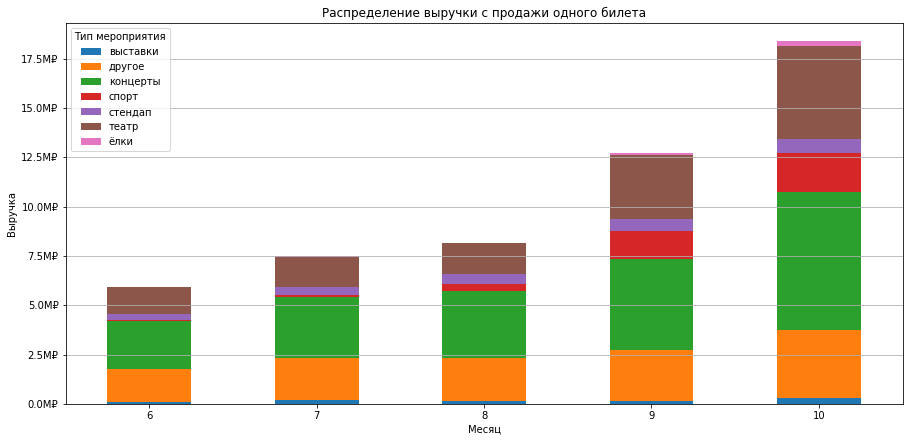

In [36]:
#сгруппируем и подсчитаем выручку с продажи одного билета для каждого мероприятия
grouped = df_final.groupby(['month', 'event_type_main'])['one_ticket_revenue_rub'].sum().unstack()

#построим гистограмму накопления
grouped.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(rotation=0)
plt.title('Распределение выручки с продажи одного билета')
plt.legend(title='Тип мероприятия')
plt.grid(axis='y')

#создадим функцию форматирования
def custom_format(value, position):
    return f'{value/1_000_000:.1f}M₽'

#поменяем формат для оси y
plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_format))
plt.show()

# Промежуточный вывод
С июня по октябрь отмечается устойчивый рост количества заказов по различным сегментам.

### Осенняя активность пользователей

- Проанализируем динамику изменений по дням для общего числа заказов

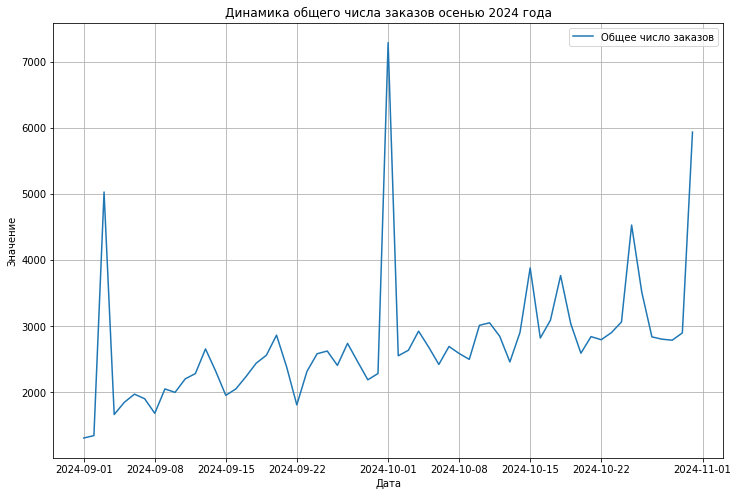

In [37]:
#группировка по дате
daily_stats = df_filtered.groupby('created_dt_msk').agg(
    total_orders=('order_id', 'count'),
    active_users=('user_id', 'nunique')
).reset_index()

#построим линейный график
plt.figure(figsize=(12,8))
plt.plot(daily_stats['created_dt_msk'], daily_stats['total_orders'], label='Общее число заказов')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.title('Динамика общего числа заказов осенью 2024 года')
plt.grid(True)
plt.show()

- Проанализируем динамику изменений по дням для количества активных пользователей

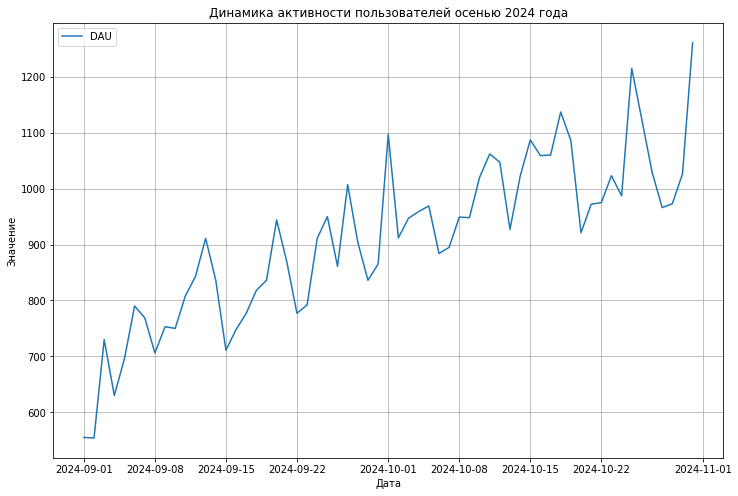

In [38]:
#построим линейный график
plt.figure(figsize=(12,8))
plt.plot(daily_stats['created_dt_msk'], daily_stats['active_users'], label='DAU')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.title('Динамика активности пользователей осенью 2024 года')
plt.grid(True)
plt.show()

- Проанализируем динамику изменений по дням для среднего числа заказов на одного пользователя

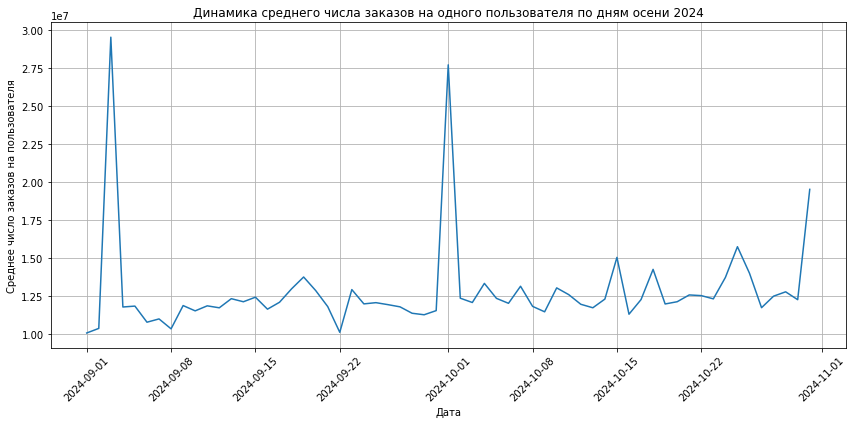

In [39]:
#группировка по дате
daily_data = df_filtered.groupby('created_dt_msk').agg({'order_id': 'sum', 'user_id': 'nunique'}).reset_index()

#вычисление среднего числа заказов на одного пользователя:
daily_data['avg_orders_per_user'] = daily_data['order_id'] / daily_data['user_id']

#построим линейный график
plt.figure(figsize=(12,6))
plt.plot(daily_data['created_dt_msk'], daily_data['avg_orders_per_user'])
plt.title('Динамика среднего числа заказов на одного пользователя по дням осени 2024')
plt.xlabel('Дата')
plt.ylabel('Среднее число заказов на пользователя')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

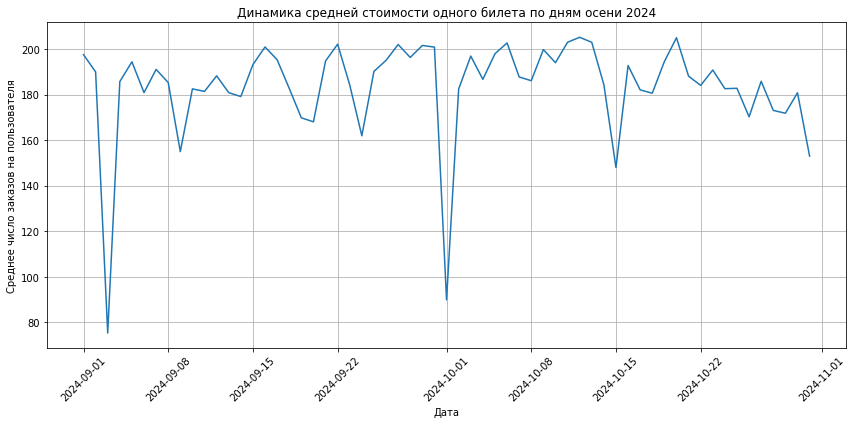

In [40]:
#группировка по дате
daily_data = df_filtered.groupby('created_dt_msk').agg({'revenue': 'sum', 'tickets_count': 'sum'}).reset_index()
daily_data['avg_orders_per_user'] = daily_data['revenue'] / daily_data['tickets_count']

#Построение графика:
plt.figure(figsize=(12,6))
plt.plot(daily_data['created_dt_msk'], daily_data['avg_orders_per_user'])
plt.title('Динамика средней стоимости одного билета по дням осени 2024')
plt.xlabel('Дата')
plt.ylabel('Среднее число заказов на пользователя')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Изучим недельную цикличность пользовательской активности в будни и выходные

In [41]:
#определение дня недели
df_filtered['day_of_week'] = df_filtered['created_dt_msk'].dt.day_name()

#группировка по дню недели
weekday_comparison = df_filtered.groupby(df_filtered['day_of_week']).agg(
    total_orders=('order_id', 'count'),
    unique_users=('user_id', 'nunique')).reset_index()

display(weekday_comparison.sort_values(by='total_orders', ascending = False))

/tmp/ipykernel_48/2325155037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['created_dt_msk'].dt.day_name()


,day_of_week,total_orders,unique_users
5,Tuesday,31198,4679
4,Thursday,26846,4866
0,Friday,24510,4752
6,Wednesday,22611,4711
1,Monday,21302,4355
2,Saturday,21160,4513
3,Sunday,19262,4354


# Промежуточный вывод

- Динамика общего числа заказов: увеличивается, пик 1 сентября и 1 отктября
- Динамика активности пользователей: активность пользователей стабильно увеличивается
- Динамика среднего числа заказов: динамика выглядит стабильной, пик 1 сентября и 1 октября
- У динамики средней стоимости одного билета тренд к снижению: наименьшие показатели 1 сентября и 1 октября
- В выходные дни наименьшее кол-во заказов

### Популярные события и партнёры

In [42]:
#для каждого региона посчитаем уникальное количество мероприятий и общее число заказов
regions = df_final.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'nunique')
).reset_index()

#общие значения для подсчёта долей
total_events = df_final['event_id'].nunique()
total_orders = df_final['order_id'].nunique()

#расчёт доли мероприятий и заказов по регионам
regions['events_share'] = regions['unique_events'] / total_events
regions['orders_share'] = regions['total_orders'] / total_orders


display("Регионы с наибольшим разнообразием мероприятий:")
display(regions.sort_values(by = 'unique_events', ascending = False).head(5))

'Регионы с наибольшим разнообразием мероприятий:'

,region_name,unique_events,total_orders,events_share,orders_share
22,Каменевский регион,5935,89607,0.266430,0.316986
59,Североярская область,3800,43744,0.170587,0.154745
76,Широковская область,1232,16169,0.055306,0.057198
56,Светополянский округ,1075,7503,0.048258,0.026542
51,Речиновская область,702,6267,0.031514,0.022170


In [43]:
#для каждого билетного партнёра посчитаем общее число уникальных мероприятий, 
#обработанных заказов и суммарную выручку с заказов билетов
services = df_final.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum')
).reset_index()

#общие значения для подсчёта долей
total_unique_events = df_final['event_id'].nunique()
total_orders = df_final['order_id'].nunique()

#расчёт долей по партнёрам
services['events_share'] = services['unique_events'] / total_unique_events
services['orders_share'] = services['total_orders'] / total_orders

#определение наиболее активных партнёров
most_active_partners = services.sort_values(by='total_revenue', ascending=False)

display("Самые активные партнёры по выручке:")
display(most_active_partners.head())

'Самые активные партнёры по выручке:'

,service_name,unique_events,total_orders,total_revenue,events_share,orders_share
3,Билеты без проблем,4196,61192,23743072.04,0.188364,0.216468
24,Облачко,2335,26402,18588613.86,0.104821,0.093398
23,Мой билет,1285,31184,17791635.35,0.057685,0.110314
20,Лови билет!,4867,40804,16670657.83,0.218486,0.144345
8,Весь в билетах,855,16410,16494669.19,0.038382,0.058051


# Промежуточный вывод

Регион с наибольшим разнообразием мероприятий - Каменевский регион, Североярская область, Широковская область, Светополянский округ,Речиновская область.В топ активных партнеров вошли: мой билет, билеты без проблем, облачко, весь в билетах, лови билет

## Статистический анализ данных

Формулировки гипотез:
- Гипотеза 1:
  - Нулевая гипотеза (H0): среднее количество заказов на пользователя мобильного приложения не выше среднего количества заказов для пользователей стационарных устройств.
  - Альтернативная гипотеза (H1): среднее количество заказов на пользователя мобильного приложения выше, чем у пользователей стационарных устройств.

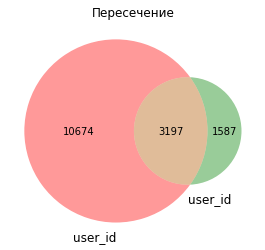

In [44]:
#отфильтруем по времени года
df_filtered = df_final[(df_final['month'] == 9) | (df_final['month'] == 10)]

#проверим на пересечения пользователей в двух группах
test_group_a = set(df_filtered[df_filtered['device_type_canonical'] == 'mobile']['user_id'])
test_group_b = set(df_filtered[df_filtered['device_type_canonical'] == 'desktop']['user_id'])

#строим диаграмму Венна
venn2([test_group_a, test_group_b], set_labels=('user_id', 'user_id'))
plt.title('Пересечение')
plt.show() 

In [45]:
#найдем пересечения
intersection_users = set(df_filtered[df_filtered['device_type_canonical'] == 'mobile']['user_id']).intersection(df_filtered[df_filtered['device_type_canonical'] == 'desktop']['user_id'])
display(f"Общих: {len(intersection_users)}")

#удалим пересечения из датафрейма
df_filtered = df_filtered[~df_filtered['user_id'].isin(intersection_users)]

'Общих: 3197'

- Проверим на выбросы выборки для первой гипотезы

In [46]:
#отфильтруем
df_filtered = df_final[(df_final['month'] == 9) | (df_final['month'] == 10)]

#создадим 2 выборки
orders_mobile = df_filtered[df_filtered['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].nunique()
orders_desktop = df_filtered[df_filtered['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].nunique()  

df_m = np.array(orders_mobile)
df_s = np.array(orders_desktop)

#проверим нормальность распределения (тест Шапиро-Уилка)
stat, p_m = stats.shapiro(df_m)
print(f"Первая выборка: {'Statistics=%.3f, p-value=%.3f' % (stat, p_m)}")

stat, p_s = stats.shapiro(df_s)
print(f"Вторая выборка: {'Statistics=%.3f, p-value=%.3f' % (stat, p_s)}")

if p_m > 0.05 and p_s > 0.05:
    print("Обе выборки распределены нормально. Применяем t-test (с поправкой Уэлча)")
else:
    print("Хотя бы одна из выборок НЕ нормально распределена. Применяем U-test (Манна-Уитни)")

Первая выборка: Statistics=0.079, p-value=0.000
Вторая выборка: Statistics=0.126, p-value=0.000
Хотя бы одна из выборок НЕ нормально распределена. Применяем U-test (Манна-Уитни)


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- Для проверки первой гипотезы буду использовать тест Манна-Уитни т.к. есть выбросы в данных

In [47]:
#проверим первую гипотезу
#создадим две выборки
orders_mobile = df_filtered[df_filtered['device_type_canonical'] == 'mobile']['order_id'].nunique()
orders_desktop = df_filtered[df_filtered['device_type_canonical'] == 'desktop']['order_id'].nunique()  

#проведем тест Манна-Уитни
alpha = 0.05
mw_test = mannwhitneyu(orders_mobile, orders_desktop, alternative='greater')

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Среднее количество заказов в мобильном приложении равно среднему количеству заказов на стационарных устройствах.')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Среднее количество заказов в мобильном приложении выше, чем у пользователей стационарных устройств.')

pvalue=0.5 > 0.05
Нулевая гипотеза находит подтверждение! Среднее количество заказов в мобильном приложении равно среднему количеству заказов на стационарных устройствах.


- Гипотеза 2:
  - Нулевая гипотеза (H0): среднее время между заказами пользователей мобильных устройств не выше среднего времени у пользователей стационарных устройств.
  - Альтернативная гипотеза (H1): среднее время между заказами пользователей мобильных устройств выше, чем у пользователей стационарных устройств.

In [48]:
#создадим 2 выборки
df_filtered = df_final[(df_final['month'] == 9) | (df_final['month'] == 10)]
orders_mobile = df_filtered[df_filtered['device_type_canonical'] == 'mobile'].groupby('days_since_prev')['order_id'].nunique()
orders_desktop = df_filtered[df_filtered['device_type_canonical'] == 'desktop'].groupby('days_since_prev')['order_id'].nunique()  

df_m = np.array(orders_mobile)
df_s = np.array(orders_desktop)

#проверим нормальность распределения (тест Шапиро-Уилка)
stat, p_m = stats.shapiro(df_m)
print(f"Первая выборка: {'Statistics=%.3f, p-value=%.3f' % (stat, p_m)}")

stat, p_s = stats.shapiro(df_s)
print(f"Вторая выборка: {'Statistics=%.3f, p-value=%.3f' % (stat, p_s)}")

if p_m > 0.05 and p_s > 0.05:
    print("Обе выборки распределены нормально. Применяем t-test (с поправкой Уэлча)")
else:
    print("Хотя бы одна из выборок НЕ нормально распределена. Применяем U-test (Манна-Уитни)")

Первая выборка: Statistics=0.087, p-value=0.000
Вторая выборка: Statistics=0.083, p-value=0.000
Хотя бы одна из выборок НЕ нормально распределена. Применяем U-test (Манна-Уитни)


- Для проверки второй гипотезы буду использовать тест Манна-Уитни т.к. есть выбросы в данных

In [49]:
#проверим вторую гипотезу
#отфильтруем 
df_filtered = df_final[(df_final['month'] == 9) | (df_final['month'] == 10)]

#создадим две выборки
mobile_times = df_filtered.loc[df_filtered['device_type_canonical'] == 'mobile']['days_since_prev'].nunique()
desktop_times = df_filtered.loc[df_filtered['device_type_canonical'] == 'desktop']['days_since_prev'].nunique()

#проведем тест Манна-Уитни
alpha = 0.05
mw_test = mannwhitneyu(mobile_times, desktop_times, alternative='greater')

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Среднее время между заказами пользователей мобильных устройств равно среднему времени у пользователей стационарных устройств.')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Среднее время между заказами пользователей мобильных устройств выше, чем у пользователей стационарных устройств.')

pvalue=0.5 > 0.05
Нулевая гипотеза находит подтверждение! Среднее время между заказами пользователей мобильных устройств равно среднему времени у пользователей стационарных устройств.


## Общий вывод и рекомендации

Работа проводилась с датасетами: 
- Датасет: `final_tickets_orders_df.csv` - включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. 
- Датасет: `final_tickets_events_df.csv` - содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.
- Датасет: `final_tickets_tenge_df.csv` - содержит информацию о курсе тенге к российскому рублю за 2024 год. 


- Основные результаты анализа: осенью кол-во заказов по мероприятиям увеличилось, наиболее востребованное мероприятие как летом, так и осенью - концерт, у динамики средней стоимости одного билета тренд к снижению, активных пользователей стало больше. 
- Среди регионов лидеры по числу заказов - Каменевский регион, Североярская область, Широковская область, Светополянский округ, Речиновская область. 
- Среди партнеров лидеры - 'мой билет', 'билеты без проблем', 'облачко', 'весь в билетах', 'лови билет'. 
- Обе гипотезы не подтвердились - среднее время между заказами пользователей мобильных устройств равно среднему времени у пользователей стационарных устройств и среднее количество заказов в мобильном приложении равно среднему количеству заказов на стационарных устройствах.

Рекомендации: я предполагаю, что пользовательский спрос на мероприятия изменился ввиду фактора сезонности. Осенью наиболее востребованными стали мероприятия: спорт и елки (относительное изменение осенних значений по сравнению с летними)
